In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append ("./helpers")
%matplotlib inline

from da_gui import *



<p><img src="http://www.esa.int/esalogo/images/logotype/img_colorlogo_darkblue.gif" scale="1%"  align="left" /> <img src="helpers/nceologo200.png", align="right" /></p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>


# Biophysical parameter retrieval with ``eoldas_ng``

#### J Gómez-Dans (NCEO & UCL)

<div class="warn">
<p> You can find this exercise as well as related information on <a href="https://jgomezdans.github.com/two_stream/">this github page</a></p>
</div>

## Introduction

In this practical, we consider the problem of extracting meaningful biophysical parameters from optical Earth Observation (EO) data. More concretely, we will use **bihemispherical broadband albedoes** as our input, interpret them through a simple **two-stream radiative transfer scheme** in order to retrieve a handful of parameters which are of interest in a large number of applications:

1. Parameters related to leaf reflectance and transmittance in the visible and near-infrarred regions of the spectrum,
2. Parameters describing the albedo of the soil under the vegetation,
3. The *amount of vegetation*, expressed through an *effective* leaf area index (LAI).

The two stream model has been used both for parameter retrieval (as we shall do here), but has also been implemented in a number of dynamic global vegetation models (DGVMs). This means that the parameters that are retrieved here will be strictly compatible with the same concepts in the DGVM, making them directly useable.

In this practical, we consider that the main role of the vegetation is in **flux partitioning**, or in other words,the amount of radiation that is absorbed by the canopy to be further used in photosynthesis, for example. 

## Bits 'n' bobs

### The input data

A number of albedo products exist, such as the [GlobAlbedo product](http://globalbedo.org) or the [MODIS albedo product](https://www.umb.edu/spectralmass/terra_aqua_modis/v006/mcd43a2_albedo_product). In either of these cases, the products produce an estimate of the **bi-hemispherical reflectance** (BHR) (or *white sky albedo*) for a particular area at a particular time. The differences in these prodcuts are to do with whether data from one particular sensor was used, but are broadly comparable.

We have extracted some data from the MODIS Collection 5 albedo product over a number of [FLUXNET sites](http://fluxnet.ornl.gov/). These are:

| Site code | Site Name |
|-----------|-----------|
|AU-Tum | Tumbarumba|
|BR-Cax | Caxiuana Forest-Almeirim|
|CA-Ca1 | BC-Campbell River 1949 Douglas-fir|
|DE-Geb | Gebesee|
|DE-Hai | Hainich|
|ES-LMa | Las Majadas del Tietar|
|FI-Hyy | Hyytiala|
|FR-Lam | Lamasquere|
|IT-SRo | San Rossore|
|RU-Ylr | Yakutsk-Larch|
|SE-Abi | Abisko|
|US-Bar | Bartlett Experimental Forest|
|US-Bo1 | Bondville|
|US-Brw | Barrow |
|US-Dk2 | Duke Forest Hardwoods|
|US-Ha2 | Harvard Forest Hemlock Site|
|US-MMS | Morgan Monroe State Forest|
|US-Me2 | Metolius Intermediate Pine|
|US-Me3 | Metolius Second Young Pine|
|US-Ne1 | Mead - irrigated continuous maize site|
|US-Ne2 | Mead - irrigated maize-soybean rotation site|
|US-Ne3 | Mead - rainfed maize-soybean rotation site|
|US-Ton | Tonzi Ranch|
|ZA-Kru | Skukuza|

We will now visualise and explore the MODIS C5 BHR data a bit with the next code snippet...

<div class="warn">
To run this, amend the following code cell with your chosen FLUXNET site (indicated by its code, e.g. <tt>"ZA-Kru"</tt> and year).
</div>


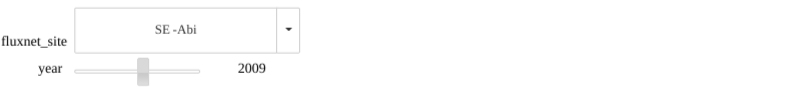

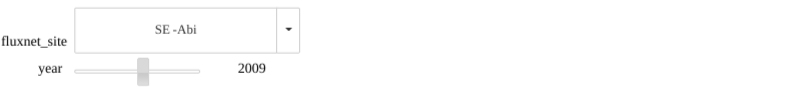

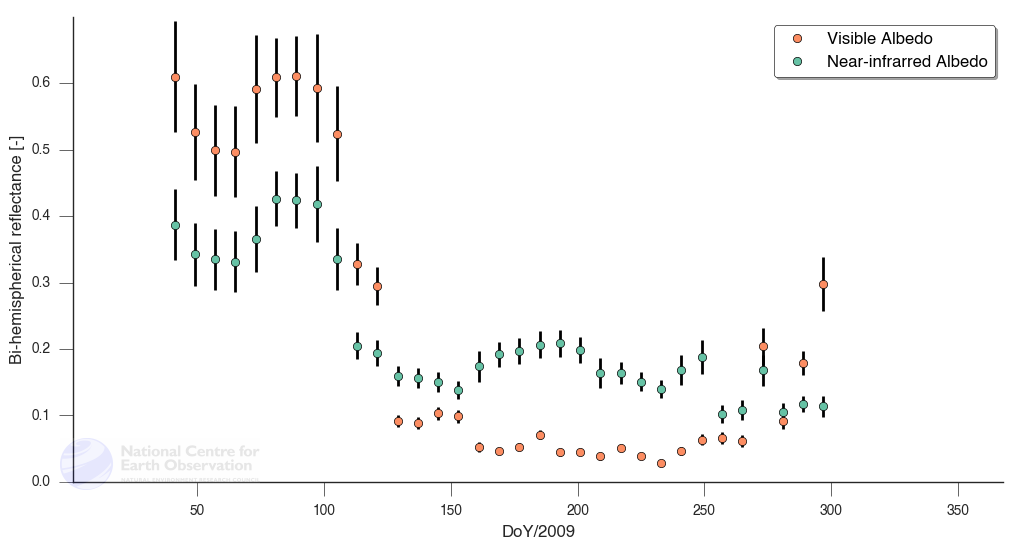

In [2]:
visualise_albedos()

<div class="question">
<ul>
<li> What are the main processes that are obvious in the data?</li>
<li> How can you relate them to the site in question?</li>
<li> Think of this in terms of radiation fluxes. What is this data telling you?</li>
</ul>
</div>

## The radiative transfer (RT) model

We will use the "two stream" radiative transfer model of ([Pinty et al. (2007)](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.131.4066&rep=rep1&type=pdf) (but also [Pinty et al, (2011)](http://onlinelibrary.wiley.com/doi/10.1029/2010JD015372/full) and others). This is a fairly simple model that has been designed to monitor radiation fluxes in the land surface. 

The model has 7 parameters:

1. Leaf **single scattering albedo** in the VISIBLE
2. Leaf **anysotropy** in the VISIBLE
3. Background **soil albedo** in the VISIBLE
4. Leaf **single scattering albedo** in the NIR
5. Leaf **anysotropy** in the NIR
6. Background **soil albedo** in the NIR
7. **Effective** leaf area index (**LAI**)

These parameters are all that's necessary to describe the fluxes in a canopy. The price paide for this simplification is that the complexities of the 3D structure of the vegetation are dealt with by using an *effective* LAI. This LAI is different to the *true* LAI (with e.g. discontinuous crown clumping, etc.), but from the point of calculating fluxes like $fAPAR$, it is entirely equivalent, and simplifies things enormously.

![TIP](http://romc.jrc.ec.europa.eu/WWW/PAGES/ROMC_Home/MISCELLANEOUS/HOM01.gif)

The model describes the canopy in terms of the leave abundance, and by the optical properties of leaves. A soil background is also included. 

The use of spectral broadbands allows for a fairly simple description of leaf optical properties, which coupled with the amount of vegetation define the vegetation optical depth.

If the vegetation is abundant, the effect of the soil will be negligible, as few photons will escape the canopy. However, if the soil is very bright (e.g. snow), this might be quite a significant amount. Also note that the vegetation optical depth is defined by the combination of leaf abundance as well as optical properties, so it is perfectly feasible to have the same albedos for two completely different canopies (e.g. one with low LAI and highly reflecting leaves, and one with darker leaves and high LAI). 

<div class="warn">
<p> Let's explore the Two Stream model. The <tt>visualise_twostream</tt> function will plot either the visible or NIR albedo sweeping one of the parameters (e.g. SSA, anysotropy, soil albedo or LAI). You can select only one parameter by setting its name to <tt>True</tt> in the function call. The parameters are <tt>omega_vis, d_vis, a_vis, lai_vis, omega_nir, d_nir, a_nir</tt> and <tt>lai_nir</tt>

</div>



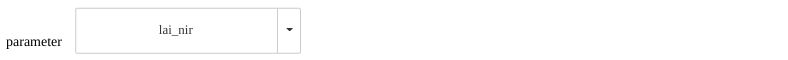

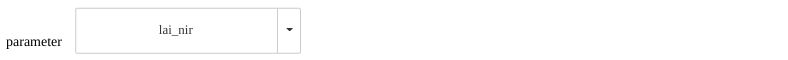

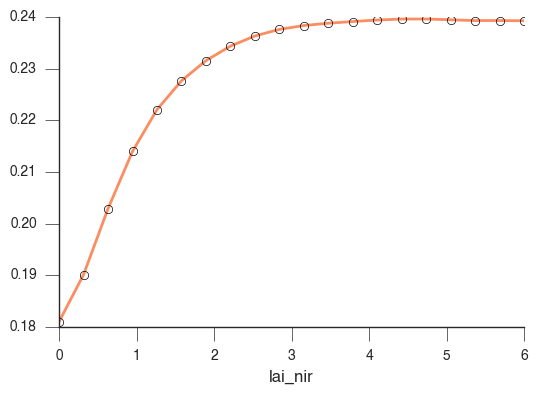

In [4]:
explore_twostream ( )

<div class="question">
<ol>
<li> What can you say about the nature of the two stream model?
<li> The leaf parameters and the LAI describe the vegetation optical depth of the canopy. Can you think of how these parameters could interact?
</ol>
</div>

## The inversion using ``eoldas_ng``

In ``eoldas_ng``, we will solve the **inverse problem** of estimating the land surface parameters from albedo measurements (the forward problem is the simulation of albedo when the land surface parameters are known). For notational convenience, we stack the seven TIP parameters into a columnt vector $\vec{x}=\left[ \omega_{VIS}, d_{VIS}, a_{VIS}, \omega_{NIR}, d_{NIR}, a_{NIR}, LAI_{e}\right]^{\top}$. The TIP model will be $\mathcal{H}$, and it predicts $\alpha_{VIS}$ and $\alpha_{NIR}$:

$$
\mathcal{H}(\vec{x}) = \left[\alpha_{VIS}, \alpha_{NIR}\right]^{\top}.
$$

The measurements of albedo are given by $\vec{R}$ (a two-element vector). Under the assumption that these measurements are contaminated by zero-mean Gaussian noise, we can write the **generative model of the observations** as

$$
\vec{R} = \mathcal{H}(\vec{x}) + \mathcal{N}(0,\mathbf{C}_{obs}).
$$

This gives rise to the (log)likelihood function

$$
p(\vec{R}|\vec{x})\propto \frac{1}{2}\left[\mathcal{H}(\vec{x}) - \vec{R}\right]^{\top}\mathbf{C}_{obs}^{-1}\left[\mathcal{H}(\vec{x}) - \vec{R}\right].
$$

We can minimise this function, but given the nature of $\mathcal{H}$ and the noise in the observations, there will be infinite solutions that pass through the measurements, so the problem is *ill posed*.

A better way is to try to supplement the observations with prior distributions of parameters, e.g. $p(\vec{x})$. If we assume that the prior distribution are normal, the likelihood is normal and we make an assumption on $\mathcal{H}$ not being too non-linear, then we can use **Bayes' Rule** to write the **probability distribution** of $\vec{x}$ when the observations $\vec{R}$ have been considered:

$$
p(\vec{x}|\vec{R})\propto \overbrace{p(\vec{x})}^{\textrm{A priori}}\cdot\underbrace{p(\vec{R}|\vec{x})}_{\textrm{Likelihood}}.
$$

It turns out that

1. We can assume $p(\vec{x}|\vec{R})$ to be **Normal**
2. Its mean vector is given by the *maximum a posteriori* (or MAP) value
3. Its covariance matrix is given by the inverse of the Hessian matrix at the MAP point.

Further, rather than solve for the MAP directly, we can solve for the value of $\vec{x}$ that minimises the **log posterior**, and we can use **gradient descent methods** for this.

``eoldas_ng`` makes all this easy to set-up. We will put some priors on parameters, and solve for each observation independently...

### The prior

We will use the prior distribution given by Pinty et al. (2011). Broadly, this is:

![the tip prior](helpers/tip_priors.png)

![the tip prior table](helpers/tip_prior_table.png)

<div class="question">
<p>The prior has already been coded up for you to use. The following widget will allow you to select a site and year, and to run the TIP inversion on the albedo data, using the TIP prior as seen above. </p>
</div>

<div class="question">
<p>In the plots, the grey areas show the <strong>prior</strong> area (mean $\pm$ 1 standard deviation. The vertical lines show the <strong>posterior</strong> area, and the line shows the prior mean (orange, dashed) and posterior mean (green, dots) </p>
</div>

<div class="warn">
<p>The next cell runs the inversions. As before, you can select the FLUXNET site, and the year. Additionally, you can specify a more restrictive prior distribution that assumes green and healthy leaves only (<tt>green_leaves=True</tt> or <tt>False</tt>). The inversion can be run for different random starting points, <tt>n_tries</tt> determines how many.

</div>


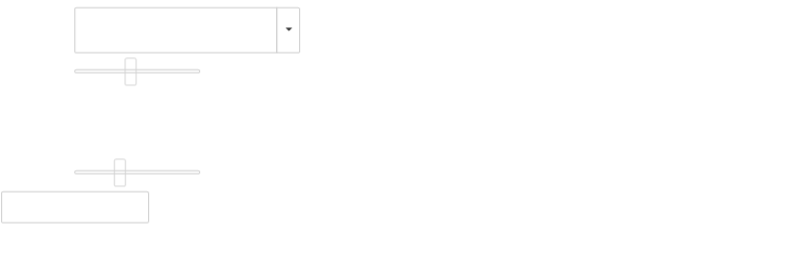

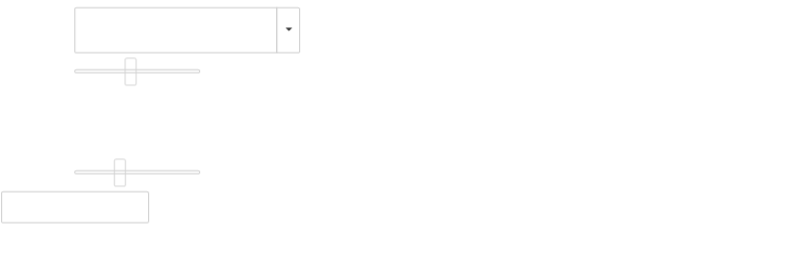

Saving results to eoldas_retval_20161123_175540_cubil


/opt/anaconda/lib/python2.7/site-packages/scipy/sparse/coo.py:359: SparseEfficiencyWarning: Constructing a DIA matrix with 322 diagonals is inefficient
  "is inefficient" % len(diags), SparseEfficiencyWarning)


[129.88494770947204, 135.58485167048943, 120.55249437630577, 105.80306285909822]
Chosen cost: 105.803


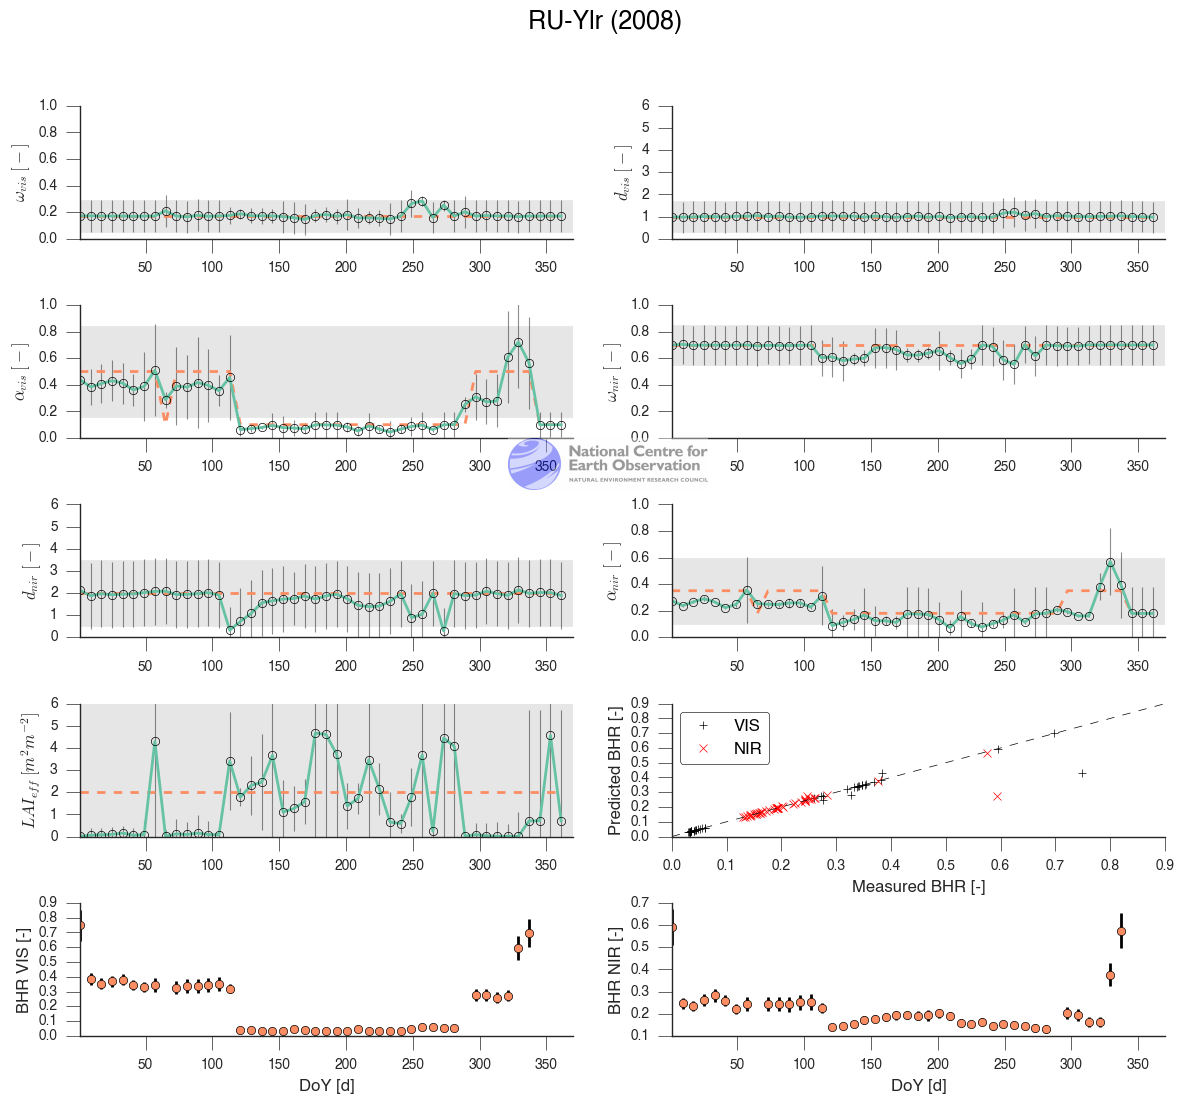

In [5]:
single_observation_inversion ()

<div class="question">
<ul>
<li> Is the solution able to reproduce the observations well?
<li> What can we say about the posterior mean for most parameters?
<li> Is there a parameter where the posterior mean is consistently very different from the prior?
<li> What about the prior vs posterior uncertainties?
<li> What happens when there's no data?
<li> What can you say about the uncertainty in e.g. LAI?
<li> Try changing the leaves to be green. Do you see changes?
<li> Run the inversion several times setting <tt>n_tries=1</tt>, and save the results. What can you observe?
</ul>
</div>

## Adding a model

While the prior used earlier is reasonable, and has used to produce a decadal record of land surface parameters, it is apparent that the results are unrealistic: $LAI_{eff}$ is typically "noisy", which we know is not something that happens in reality, where the amount of vegetation changes **smoothly** (unless some disturbance event happens!).

So rather than specifying always the same $LAI_{eff}$ as above, we could specify a *model* of the temporal evolution of $LAI_{eff}$. Although such models *do exist*, maybe we don't want to *pollute* the data with model assumptions. So what could be a very simple model for e.g. $LAI_{eff}$ to use? Possibly the simplest model is to assume that the $LAI_{eff}$ doesn't change from day to day, but (critically), we assume that the **model is wrong**. In other words, we can write the model with its error as:

$$
LAI_{eff}(t + 1) = LAI_{eff}(t) + \mathcal{N}\left(0,\frac{1}{\gamma}\right)
$$

This model has interesting properties: it dampens high frequency variations in $LAI_{eff}$, and thus results in smoother trajectories, and also reduces uncertainty significantly (e.g. [*Lewis et al., (2012)*](http://dx.doi.org/10.1016/j.rse.2011.12.027)). Also, the model could also be used for all other land surface parameters.

As before, we'll have a play with the experiment...

<div class="question">
<ul>
<li> Select a site and year, and an amount of LAI regularisation ($\gamma$). Typical values go from around 0.8 to 100, but feel free to explore other ranges (note that $\gamma \ge 0$ though!)</li>
<li> What's the effect on the trajectory of the posterior mean? Compare the the dashed green line with the orane dotted line.</li>
<li> What's the effect of adding this model to the posterior uncertainties?</li>
<li> If you select a site with data gaps, what happens to the estimate of $LAI_{eff}$ in the data gaps?</li>
<li> What happens if you increaes $\gamma$ to a large value in situations where you have snow? Is this desirable?
</ul>
</div>

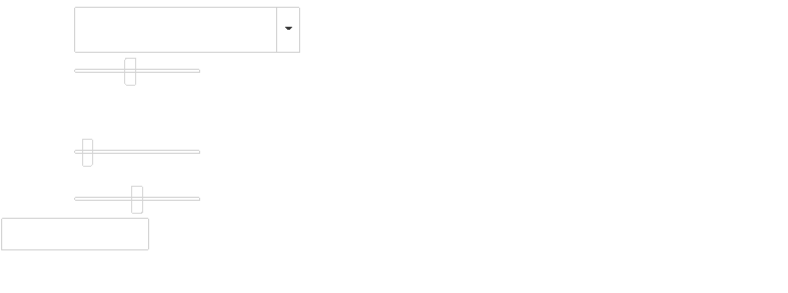

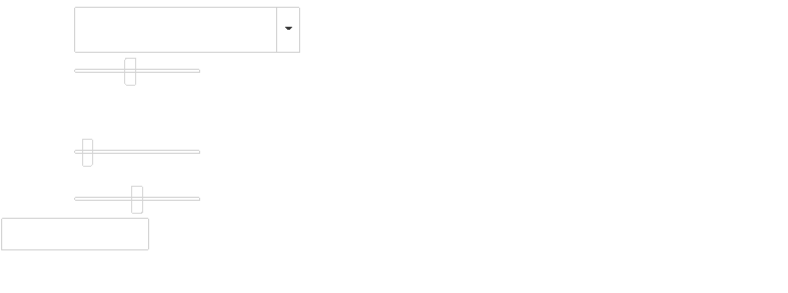

Saving results to eoldas_retval_20161123_175811_cubil
[26.729354826877348, 26.568965052390475, 26.53975291358616, 27.630845585759797, 27.202987304983886, 26.555130041898856, 26.549655008313447, 26.935633256142179, 26.678234367927498, 27.532317993490466]
Chosen cost: 26.5398
Saving results to eoldas_retval_20161123_180244_cubil
[31.770831905035074, 31.76881732761656, 31.61556738682825, 31.695815508157651, 31.949211500075371, 48.274072742560293, 49.21711405083169, 31.702496365845843, 48.013947372855455, 31.664323272632487]
Chosen cost: 31.6156


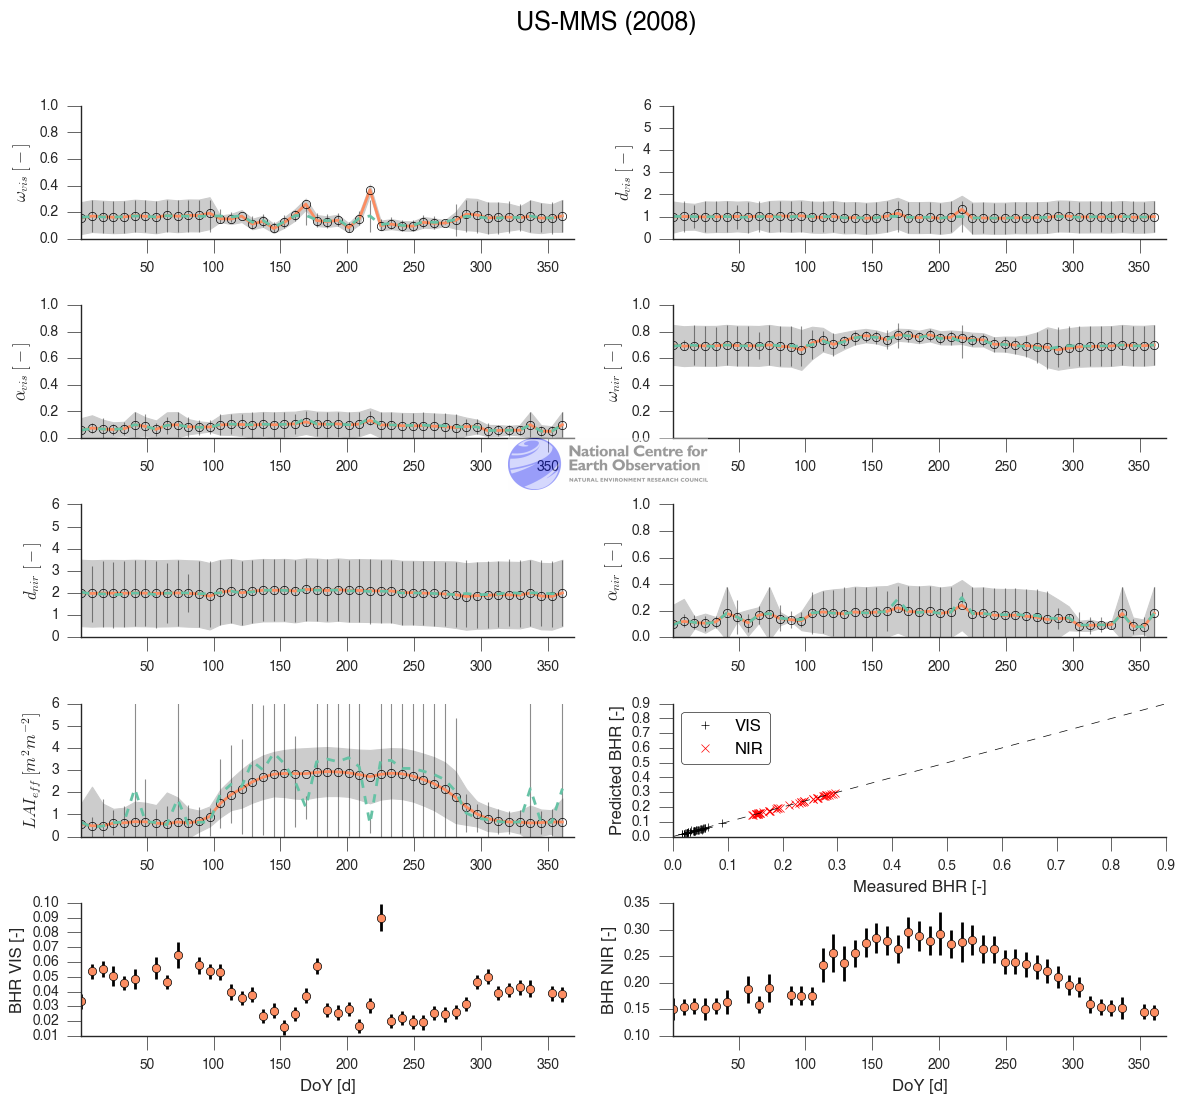

In [7]:
regularised_inversion()

## Observational uncertainty

The previous experiments have assumed a relative uncertainty in the albedos of 5 or 7% (depending whether the retrieval was considered a high or a low quality one). But what would happen if the uncertainty were larger? 

<div class="warn">
<p>The <tt>regularised_inversion</tt> function can be used to change the uncertainty by setting the optional <tt>albedo_unc</tt> parameter. This is set by default to <tt>[0.05, 0.07]</tt> but you can change it to something higher and see the results.
</div>

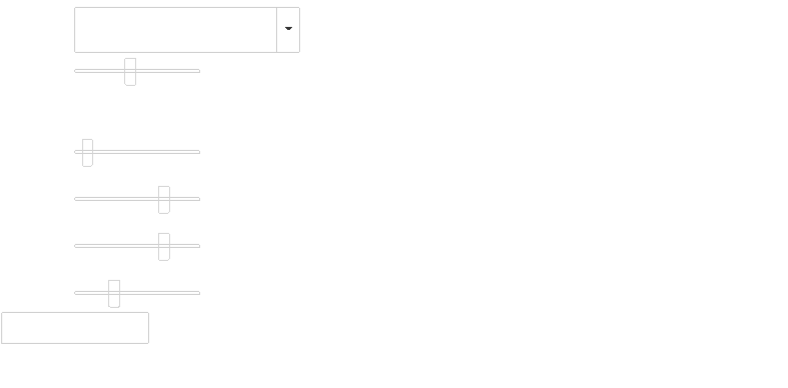

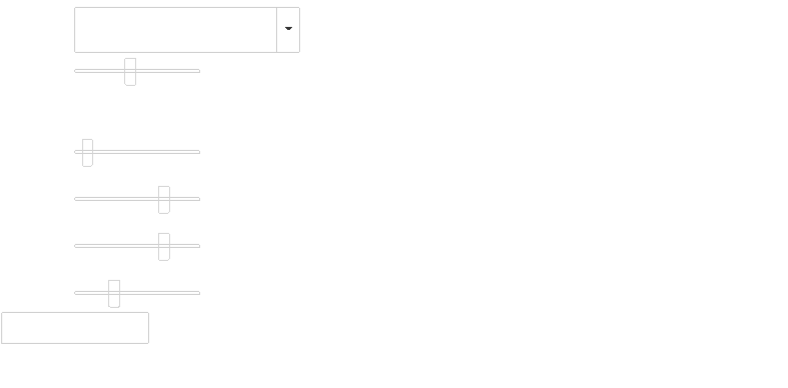

[0.15, 0.15]
Saving results to eoldas_retval_20161123_181342_cubil


/opt/anaconda/lib/python2.7/site-packages/scipy/sparse/coo.py:359: SparseEfficiencyWarning: Constructing a DIA matrix with 322 diagonals is inefficient
  "is inefficient" % len(diags), SparseEfficiencyWarning)


[13.041797019701582, 13.274664087114736]
Chosen cost: 13.0418
Saving results to eoldas_retval_20161123_181406_cubil
[32.088682735212096, 33.154065439273388]
Chosen cost: 32.0887


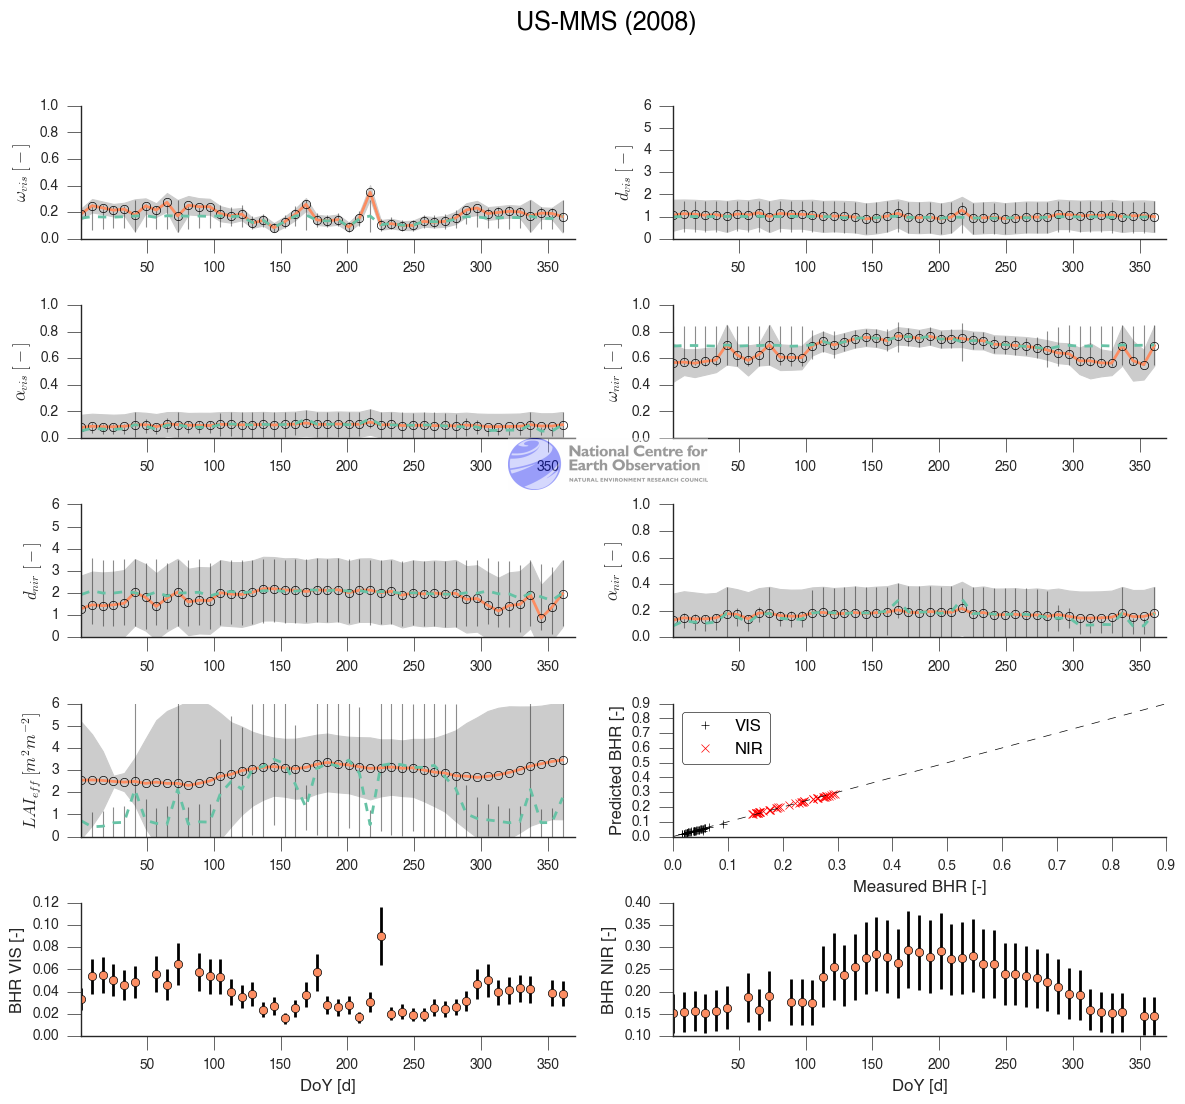

In [3]:
regularised_inversion_unc()

<div class="question">
<ul>
<li> Have a go changing the uncertainty and seeing what the effect is.
<li> Is this the correct way of proceeding? What's the limitation of this exercise?
<li> Now consider the effect of <tt>gamma_lai</tt>. Can you use the temporal regularisation to compensate for the higher uncertainty?
</ul>
</div>